# COGS 108 - Final Project 

# Overview
Our project predicts whether the following day’s weather in Australia will have rain or not. After taking into account various weather features(wind direction, range of temperatures, rainfall, etc.), we worked with the data to determine which feature(s) would have the most effect on weather prediction accuracy of the following day. We found humidity to be the most significant feature in weather prediction.

# Names and IDs
Achint Singh: A12661765

Jonathan Choi: A12910079

Xuanyu Wu: A14482228

Iris Chan: A12839351

Elliot Pourmand: A14731789

# Research Question
Which weather feature (or combination of features) has the greatest influence over the overall accuracy when predicting the weather of the next day (rain or not) in Australia?

## Background and Prior Work
The dataset we will be looking at has compiled weather information from various weather stations in Australia. It notes general logistical information about the weather as well as whether or not it rained the following day. The objective of the dataset was to predict whether it would rain the next day (given the weather patterns in Australia). 

Our question aims to further delve into how weather is predicted on a daily basis. Weather predictions are currently predicted using forecasting models as well as data collected from satellites. This information is generally recorded in historical datasets by location recording the weather history of each location. Given this knowledge, we know that we do have the scientific and statistical advancements to predict rain based on past and present data. However, it is also important to recognize the limitations of this analysis. Compared to the power of satellites, purely using machine learning and data will be restrictive. This is one thing we will keep in mind in pursuing analysis. We want to further investigate all the recorded values and what elements contribute the greatest to the weather predictions. 

There were several smaller scale weather prediction products online that could be used as a reference for further approach in this project. Taking a study at Stanford, “Machine Learning Applied to Weather Forecasting”, they were able to create both linear and functional regression models that outperformed professional datasets that were used. They noted that their linear regression model thrived under large amounts of data, which is one that we can take from their study. We intend to use a large amount of data.

Another article online was able to use the Stanford study to corroborate their findings and create a fairly accurate linear regression model to analyze and predict the weather data. 

In doing research, we were able to find a Medium article discussing the weather prediction algorithm. They noticed that using a limited range of elements may decrease the accuracy. If that is the case, it is valuable to increase the historical component of the weather data. This association of the number of elements and time is one that our group will be considering in our analysis. Also noted from research was that weather trends have derailed due to climate change. This is also important to note when looking at time as a major component in the prediction process.

For our own project, we initially considered using a linear regression model for general weather trends. However, because the nature of our project was to note specific features that impacted weather predictions, we chose to train models instead. More specifically, we trained models isolating different features and identifying which ones most clearly indicated prediction of rain. We did notice a general decline in precision of accuracy as we limited the range of elements. This was corroborated by the Medium article.

Sources:
https://pdfs.semanticscholar.org/2761/8afb77c5081d942640333528943149a66edd.pdf

https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-2/

https://medium.com/@shivamtrivedi25/what-is-the-weather-prediction-algorithm-how-it-works-what-is-the-future-a159040dd269


# Hypothesis
Since rain is formed by the condensation of warm and humid air as it rises and cools, it is possible that the more humid the atmosphere is, the more likely it will rain the next day. Therefore, we hypothesize that humidity will be the most significant feature in predicting the weather of the next day. 

# Dataset(s)
Our dataset is composed of weather metrics and observations from multiple Australian weather stations. 

The observations are taken between the dates,  2008-12-01 and  2016-11-26. The dataset is composed of 23 columns and 142,000 data points. 

What makes this dataset great at tackling our question is that this dataset has a large number of features. This gives us a large amount of data to work with in determining which features are the most significant. 

The dataset was found on Kaggle.com and is located at the url: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Setup

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Data Cleaning

In order to clean the dataset we first made note of any columns that high numbers of NaN values. We chose to drop those columns completely when we found that over half the values in those columns were NaN values. We then further dropped rows that contained any NaN values. There were several columns in general that needed to be dropped, because they objectively did not contribute to the question at hand including date and wind direction. Lastly, we changed one categorical variable (Rain Tomorrow) into a boolean value of 0 or 1 in order to be easily accessible for computation. After doing this, our data was clean to begin being used for analysis and begin looking at the data distribution. Overall, the data was relatively clean to begin with and we were simply able to filter through the information to extract exactly what was needed.

After cleaning the data into a usable format, we noticed some inconsistencies with the data. There was not an equal weighting between the days in which it rained and did not. This lack of weighting would create an inconsistency and weight the predictions favoring one side over the other. In order to resolve this we discussed both downsampling and upsampling. Ultimately, we felt that downsampling would be the best decision, because upsampling required us to replicate data. This felt staged and also gave us far more data than computing power would allow us to deal with. We therefore, chose to randomly remove particular datasets in order to even out and make the data of whether it rained or not an equal split. 

Additionally, in plotting the values we used the z-score to create a more consistent scaling on the visualizations. 


### Drop Columns with Large Amounts of Null

In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(119590, 14)

In [7]:
# Encode Binary Labels for True/False Values
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Identify Outliers
By plotting histograms of our features we are able to visualize the distribution and identify outliers.

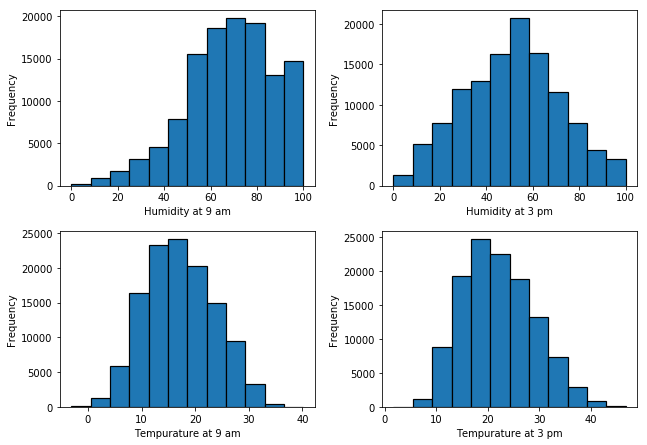

In [8]:

n_bins = 12
grid = plt.GridSpec(4, 4)#, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

ax1.hist(df['Humidity9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Humidity at 9 am')
ax1.set_ylabel('Frequency')

ax2.hist(df['Humidity3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Humidity at 3 pm')
ax2.set_ylabel('Frequency')

ax3.hist(df['Temp9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Tempurature at 9 am')
ax3.set_ylabel('Frequency')

ax4.hist(df['Temp3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax4.set_xlabel('Tempurature at 3 pm')
ax4.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

We can see there are some clear outliers in humidity and tempurature at 9 am and 3 pm. Below we trim off some outliers for some of our features.

In [9]:
print(f"Dropping {len(df[df['Temp9am'] <= 5])} rows where (Temperature at 9 am) is less than 6 degrees")
df = df[df['Temp9am'] > 5]
print(f"Dropping {len(df[df['Temp3pm'] > 42])} rows where (Temperature at 3 pm) is greater than 42 degrees")
df = df[df['Temp3pm'] <= 42]
print(f"Dropping {len(df[df['Humidity9am'] <= 9])} rows where (Humidity at 9 am) is less than 10")
df = df[df['Humidity9am'] > 10]
print(df.shape)

Dropping 2265 rows where (Temperature at 9 am) is less than 6 degrees
Dropping 150 rows where (Temperature at 3 pm) is greater than 42 degrees
Dropping 251 rows where (Humidity at 9 am) is less than 10
(116855, 14)


# Data Analysis & Results

We primarily studied the distributions of 4 variables: Humidity at 9 am, Humidity at 3 pm, Temperature at 9 am, and Temperature at 3 pm. Both the temperature distributions were fairly similar to each other, while the humidity distributions varied. More notably, we also saw outliers in the humidity distributions and they were removed before proceeding.

In order to note relationships between variables, we implemented a correlation matrix. There were no features in particular that were correlated more than expected. Humidity at different timings of the day as well as temperature at different timings of the day were correlated with each, as expected. However, if we do compare features that were correlated with rainfall, we can see that the highest correlation is between Humidity and Rainfall. This would further be corroborated by other models.

We trained our model based on the different features, including Humidity, Temperature, and Rainfall. Our model could predict tomorrow’s rainfall with 87.28% accuracy. We then tested the significance of the 5 most highly correlated features by dropping each feature and seeing the change in the prediction’s accuracy. The one that decreases the prediction accuracy the most would be the feature that is most significant in predicting whether or not it would rain the next day. We expected the most highly correlated feature to RainTomorrow would also most significantly contribute to the accuracy of our model. From our findings, we confirmed that Humidity, the most highly correlated feature, was indeed most significant to predicting RainTomorrow.


### Find correlations

We first plot a correlation heatmap to see the all the correlations between each features

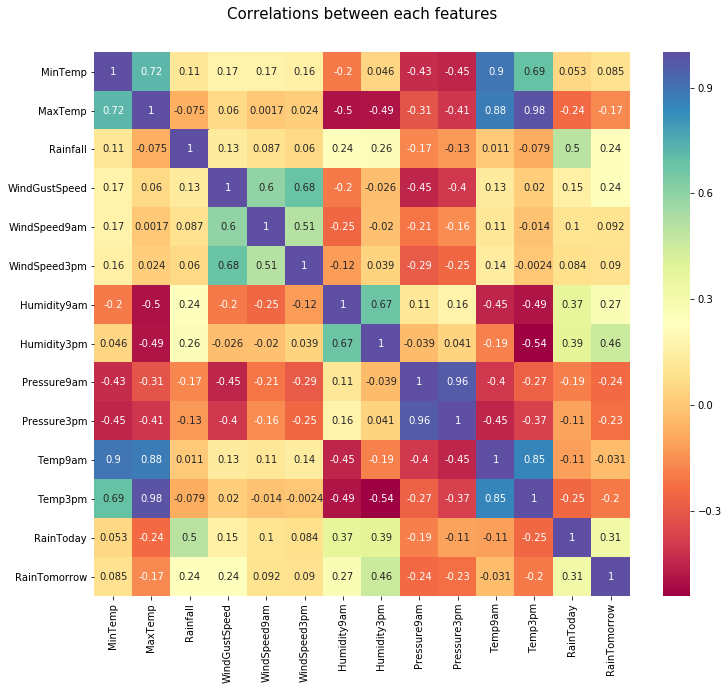

In [10]:

plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Then we extract the correlations with 'RainTomorrow' to have a closer look

Text(0,0.5,'Correlation to RainTomorrow')

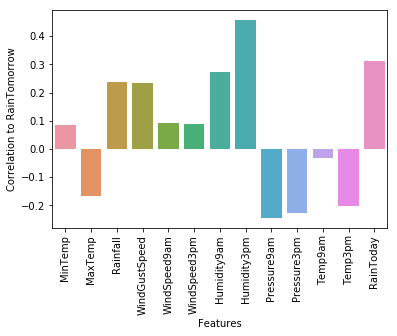

In [11]:
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainTomorrow'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

In [12]:
# A closer look into the numbers
raintomorrow_corrs['RainTomorrow'] = [abs(i) for i in raintomorrow_corrs['RainTomorrow']]
raintomorrow_corrs = raintomorrow_corrs.sort_values(by = 'RainTomorrow', ascending = False)
raintomorrow_corrs[:5]

,index,RainTomorrow
7,Humidity3pm,0.456052
12,RainToday,0.313550
6,Humidity9am,0.271905
8,Pressure9am,0.244576
2,Rainfall,0.237617


From the bar plot above, we can see that the top 5 most correlated features are 'Humidity3pm','RainToday','Humidity9am','Pressure9am',and 'Rainfall'. Those are probably the most significant features in our prediction, so we trained several models below to confirm our theory.

Note: 
Here, we rank the features based on the absolute value of their correlations, which represent the strength of correlation.

#### Helper Functions

In [13]:
def plot_model_results(history):
    val_loss = history.history['val_loss']
    train_loss = history.history['loss']
    val_acc = history.history['val_acc']
    train_acc = history.history['acc']


    plt.rcParams['figure.figsize'] = [12, 5]

    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    x_range = len(train_loss)
    
    # Loss Axis
    ax1.plot(list(range(x_range)), train_loss)
    ax1.plot(list(range(x_range)), val_loss)
    ax1.set_xlabel('Epoch')
    ax1.legend(['training loss', 'validation loss'])
    ax1.set_ylabel('Binary Cross Entropy Loss')

    # Accuracy Axis
    ax2.plot(list(range(x_range)), train_acc)
    ax2.plot(list(range(x_range)), val_acc)
    ax2.legend(['training accuracy', 'validation accuracy'])
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()


def split_data(df, val_pct=.2, test_pct=.1):
    val_size   = int(val_pct * df.shape[0])
    test_size  = int(test_pct * df.shape[0])
    train_size = int((1.0 - (val_pct + test_pct)) * df.shape[0])
    df_train = df[:train_size]
    df_val = df[train_size : train_size + val_size]
    df_test = df[train_size + val_size : train_size + val_size + test_size]
    
    print(f"Training data length:   {len(df_train)}")
    print(f"Validation data length: {len(df_val)}")
    print(f"Test data length:       {len(df_test)}")

    y_train = df_train['RainTomorrow'].values
    y_test = df_test['RainTomorrow'].values
    y_val = df_val['RainTomorrow'].values
    X_train = df_train.drop(columns=['RainTomorrow']).values

    X_test = df_test.drop(columns=['RainTomorrow']).values
    X_val = df_val.drop(columns=['RainTomorrow']).values

    return X_train, X_val, X_test, y_train, y_val, y_test

## Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [14]:
rain_tomorrow = df['RainTomorrow']
df = (df - df.mean()) / df.std()
df['RainTomorrow'] = rain_tomorrow

X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.128913,-0.106483,-0.206059,0.275396,0.629094,0.555250,0.158151,-1.400501,-1.401285,-1.158545,-0.081504,-0.045970,-0.537262,0
1,-0.846313,0.215952,-0.276203,0.275396,-1.199439,0.324134,-1.286403,-1.255039,-0.987789,-1.057633,-0.032851,0.328283,-0.537262,0
2,0.047644,0.303889,-0.276203,0.424875,0.514810,0.786367,-1.607415,-1.012603,-1.415544,-0.927888,0.583419,0.163612,-0.537262,0
3,-0.553745,0.640980,-0.276203,-1.219390,-0.399456,-1.178124,-1.232901,-1.691425,0.010307,-0.336831,0.113108,0.657626,-0.537262,0
4,0.795317,1.271194,-0.159297,0.051178,-0.856589,0.093017,0.746673,-0.867141,-0.959271,-1.317121,0.064455,1.136671,-0.537262,0


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

## Model 1 (Baseline)
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting. We use all of the features of our dataset to establish a baseline of performance. We will compare our reduced feature performace to this model.

In [15]:


INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 10
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 18us/step - loss: 0.3746 - acc: 0.8399 - binary_crossentropy: 0.3746 - val_loss: 0.3526 - val_acc: 0.8483 - val_binary_crossentropy: 0.3526
Epoch 2/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3614 - acc: 0.8453 - binary_crossentropy: 0.3614 - val_loss: 0.3308 - val_acc: 0.8604 - val_binary_crossentropy: 0.3308
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3578 - acc: 0.8470 - binary_crossentropy: 0.3578 - val_loss: 0.3242 - val_acc: 0.8615 - val_binary_crossentropy: 0.3242
Epoch 4/10
81798/81798 [==============================] - 1s 11us/step - loss: 0.3563 - acc: 0.8476 - binary_crossentropy: 0.3563 - val_loss: 0.3376 - val_acc: 0.8564 - val_binary_crossentropy: 0.3376
Epoch 5/10
81798/81798 [==============================] - 1s 11us/step - loss: 0.3547 - acc: 0.8478 - binary_crossentropy: 0.3547 - val_loss: 0.32

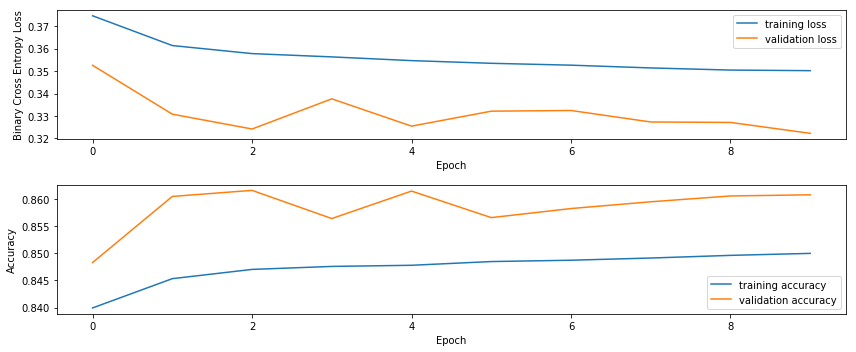

In [17]:
plot_model_results(history)

In [18]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 1\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 14us/step
Model 1
Test Loss: 0.2913486664944994
Test Accuracy: 0.8747111681643133


### Now train models with different features dropped
In this section, We drop the top 5 most correlated features that we picked in the previous section one by one. The one that affects test accuracy the most would be the most representative feature in our prediction.


#### Humidity 3pm

In [19]:
df_h = df.drop(columns=['Humidity3pm'])
X_train_h3pm, X_val_h3pm, X_test_h3pm, y_train_h3pm, y_val_h3pm, y_test_h3pm = split_data(df_h, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h3pm.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = History()
model.fit(X_train_h3pm, y_train_h3pm, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h3pm, y_val_h3pm), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 16us/step - loss: 0.4001 - acc: 0.8234 - binary_crossentropy: 0.4001 - val_loss: 0.3490 - val_acc: 0.8514 - val_binary_crossentropy: 0.3490
Epoch 2/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3799 - acc: 0.8351 - binary_crossentropy: 0.3799 - val_loss: 0.3401 - val_acc: 0.8576 - val_binary_crossentropy: 0.3401
Epoch 3/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3761 - acc: 0.8367 - binary_crossentropy: 0.3761 - val_loss: 0.3375 - val_acc: 0.8581 - val_binary_crossentropy: 0.3375
Epoch 4/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3746 - acc: 0.8380 - binary_crossentropy: 0.3746 - val_loss: 0.3453 - val_acc: 0.8538 - val_binary_crossentropy: 0.3453
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3725 - acc: 0.8386 - binary_crossentropy: 0.3725 - val_loss: 0.33

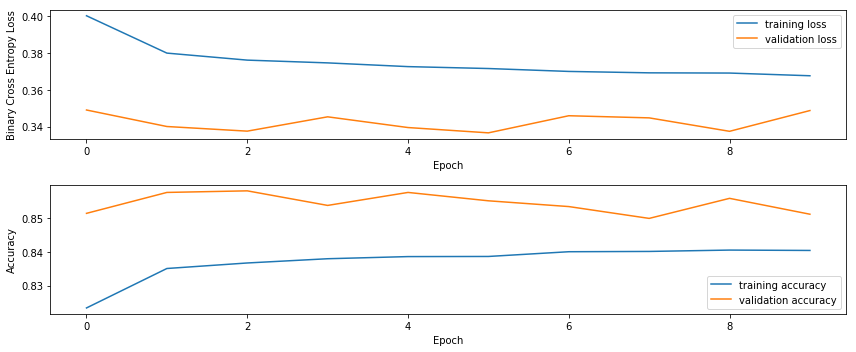

In [21]:
plot_model_results(history)

In [22]:
test_loss_h3pm, test_acc_h3pm, t = model.evaluate(X_test_h3pm, y_test_h3pm)
print(f"Test Loss: {test_loss_h3pm}\nTest Accuracy: {test_acc_h3pm}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.30633143719682643
Test Accuracy: 0.8721437740693196


#### Rain Today

In [23]:
df_rt = df.drop(columns=['RainToday'])
X_train_rt, X_val_rt, X_test_rt, y_train_rt, y_val_rt, y_test_rt = split_data(df_rt, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rt.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = History()
model.fit(X_train_rt, y_train_rt, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rt, y_val_rt), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3784 - acc: 0.8363 - binary_crossentropy: 0.3784 - val_loss: 0.3262 - val_acc: 0.8652 - val_binary_crossentropy: 0.3262
Epoch 2/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3620 - acc: 0.8446 - binary_crossentropy: 0.3620 - val_loss: 0.3281 - val_acc: 0.8635 - val_binary_crossentropy: 0.3281
Epoch 3/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3595 - acc: 0.8463 - binary_crossentropy: 0.3595 - val_loss: 0.3162 - val_acc: 0.8656 - val_binary_crossentropy: 0.3162
Epoch 4/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3569 - acc: 0.8472 - binary_crossentropy: 0.3569 - val_loss: 0.3224 - val_acc: 0.8633 - val_binary_crossentropy: 0.3224
Epoch 5/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.3548 - acc: 0.8484 - binary_crossentropy: 0.3548 - val_loss: 0.32

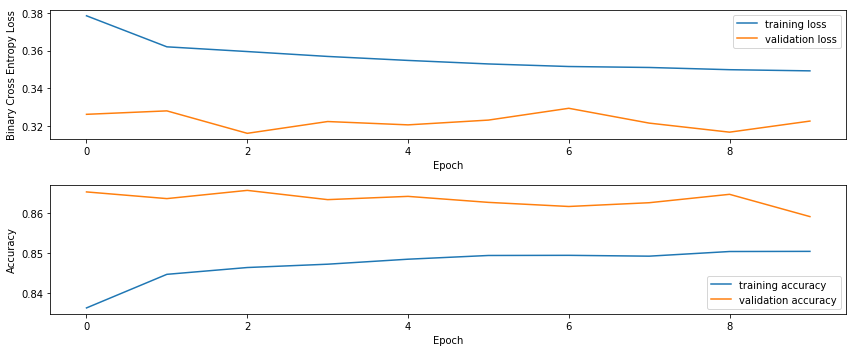

In [25]:
plot_model_results(history)

In [26]:
test_loss_rt, test_acc_rt, t = model.evaluate(X_test_rt, y_test_rt)
print(f"Test Loss: {test_loss_rt}\nTest Accuracy: {test_acc_rt}")

11685/11685 [==============================] - 0s 17us/step
Test Loss: 0.28649358873398617
Test Accuracy: 0.8783910997004707


#### Humidity 9am

In [27]:
df_h9 = df.drop(columns=['Humidity9am'])
X_train_h9am, X_val_h9am, X_test_h9am, y_train_h9am, y_val_h9am, y_test_h9am = split_data(df_h9, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_h9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = History()
model.fit(X_train_h9am, y_train_h9am, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_h9am, y_val_h9am), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 20us/step - loss: 0.3767 - acc: 0.8381 - binary_crossentropy: 0.3767 - val_loss: 0.3266 - val_acc: 0.8630 - val_binary_crossentropy: 0.3266
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3634 - acc: 0.8439 - binary_crossentropy: 0.3634 - val_loss: 0.3243 - val_acc: 0.8643 - val_binary_crossentropy: 0.3243
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3604 - acc: 0.8460 - binary_crossentropy: 0.3604 - val_loss: 0.3332 - val_acc: 0.8603 - val_binary_crossentropy: 0.3332
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3582 - acc: 0.8457 - binary_crossentropy: 0.3582 - val_loss: 0.3283 - val_acc: 0.8632 - val_binary_crossentropy: 0.3283
Epoch 5/10
81798/81798 [==============================] - 1s 16us/step - loss: 0.3566 - acc: 0.8472 - binary_crossentropy: 0.3566 - val_loss: 0.33

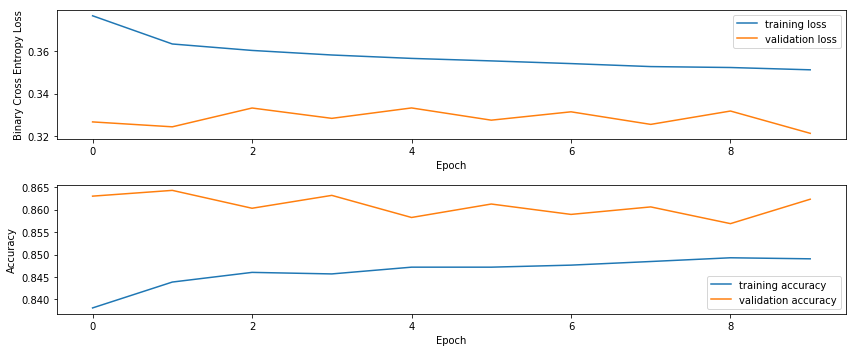

In [29]:
plot_model_results(history)

In [30]:
test_loss_h9am, test_acc_h9am, t = model.evaluate(X_test_h9am, y_test_h9am)
print(f"Test Loss: {test_loss_h9am}\nTest Accuracy: {test_acc_h9am}")

11685/11685 [==============================] - 0s 21us/step
Test Loss: 0.28844563646921884
Test Accuracy: 0.8747967479674796


#### Rainfall

In [31]:
df_rf = df.drop(columns=['Rainfall'])
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = split_data(df_rf, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_rf.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = History()
model.fit(X_train_rf, y_train_rf, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_rf, y_val_rf), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 20us/step - loss: 0.3797 - acc: 0.8367 - binary_crossentropy: 0.3797 - val_loss: 0.3355 - val_acc: 0.8571 - val_binary_crossentropy: 0.3355
Epoch 2/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.3623 - acc: 0.8446 - binary_crossentropy: 0.3623 - val_loss: 0.3387 - val_acc: 0.8570 - val_binary_crossentropy: 0.3387
Epoch 3/10
81798/81798 [==============================] - 1s 17us/step - loss: 0.3590 - acc: 0.8472 - binary_crossentropy: 0.3590 - val_loss: 0.3232 - val_acc: 0.8643 - val_binary_crossentropy: 0.3232
Epoch 4/10
81798/81798 [==============================] - 1s 18us/step - loss: 0.3567 - acc: 0.8470 - binary_crossentropy: 0.3567 - val_loss: 0.3233 - val_acc: 0.8629 - val_binary_crossentropy: 0.3233
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3547 - acc: 0.8472 - binary_crossentropy: 0.3547 - val_loss: 0.32

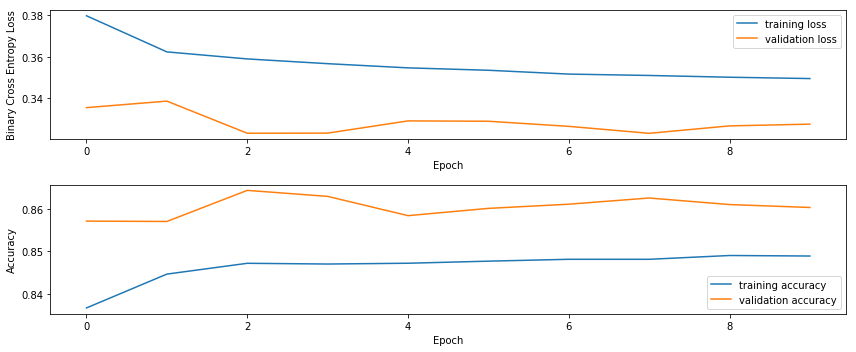

In [33]:
plot_model_results(history)

In [34]:
test_loss_rf, test_acc_rf, t = model.evaluate(X_test_rf, y_test_rf)
print(f"Test Loss: {test_loss_rf}\nTest Accuracy: {test_acc_rf}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.2929972649027885
Test Accuracy: 0.8734274711168164


#### Pressure 9 am

In [35]:
df_p9am = df.drop(columns=['Rainfall'])
X_train_p9am, X_val_p9am, X_test_p9am, y_train_p9am, y_val_p9am, y_test_p9am = split_data(df_p9am, val_pct=.2, test_pct=.1)


INPUT_DIM = X_train_p9am.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

Training data length:   81798
Validation data length: 23371
Test data length:       11685
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = History()
model.fit(X_train_p9am, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val_p9am, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 2s 19us/step - loss: 0.3765 - acc: 0.8378 - binary_crossentropy: 0.3765 - val_loss: 0.3522 - val_acc: 0.8517 - val_binary_crossentropy: 0.3522
Epoch 2/10
81798/81798 [==============================] - 1s 15us/step - loss: 0.3619 - acc: 0.8447 - binary_crossentropy: 0.3619 - val_loss: 0.3199 - val_acc: 0.8665 - val_binary_crossentropy: 0.3199
Epoch 3/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3591 - acc: 0.8457 - binary_crossentropy: 0.3591 - val_loss: 0.3236 - val_acc: 0.8648 - val_binary_crossentropy: 0.3236
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3572 - acc: 0.8461 - binary_crossentropy: 0.3572 - val_loss: 0.3283 - val_acc: 0.8629 - val_binary_crossentropy: 0.3283
Epoch 5/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.3551 - acc: 0.8470 - binary_crossentropy: 0.3551 - val_loss: 0.32

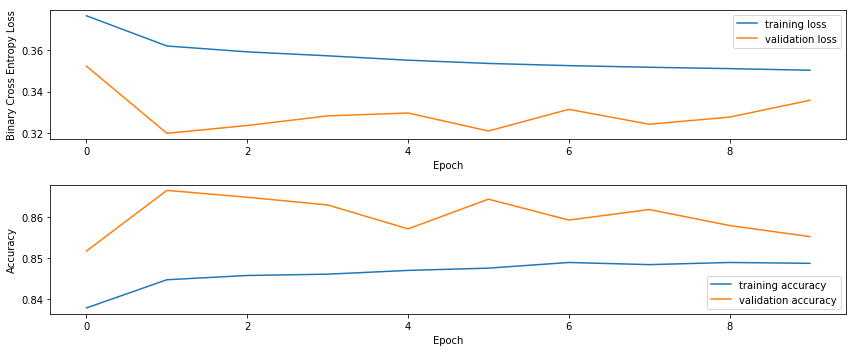

In [37]:
plot_model_results(history)

In [38]:
test_loss_p9am, test_acc_p9am, t = model.evaluate(X_test_p9am, y_test)
print(f"Test Loss: {test_loss_p9am}\nTest Accuracy: {test_acc_p9am}")

11685/11685 [==============================] - 0s 15us/step
Test Loss: 0.2881972600805151
Test Accuracy: 0.8765939238339752


#### Rank Models

In [39]:
result = {'Models':['Base line','Without Humidity 3pm',"Without Rain Today", 'Without Humidity 9am','Without Rainfall','Without Pressure 9am'], 
          'Test Accuracy':[test_acc, test_acc_h3pm, test_acc_rt, test_acc_h9am,test_acc_rf, test_acc_p9am]}
result_df = pd.DataFrame(data = result)
result_df['Difference from Base line'] = [test_acc - i for i in result_df['Test Accuracy']]
result_df.sort_values(by = 'Difference from Base line', ascending=False).set_index('Models')

,Test Accuracy,Difference from Base line
Models,,
Without Humidity 3pm,0.872144,0.002567
Without Rainfall,0.873427,0.001284
Base line,0.874711,0.000000
Without Humidity 9am,0.874797,-0.000086
Without Pressure 9am,0.876594,-0.001883
Without Rain Today,0.878391,-0.003680


Text(0,0.5,'Differences')

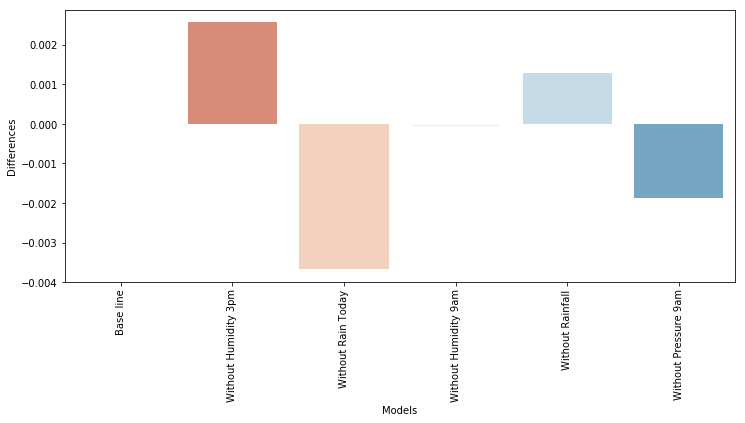

In [40]:
sns.barplot(x = 'Models', y = 'Difference from Base line', data = result_df, palette=sns.color_palette("RdBu", n_colors=7))
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Differences')

### Result
From the plot above, we can see that the most significant features in our prediction are Rain Today and Humidity (the furthest to baseline). Since RainToday also positively correlated with humidity based on our heatmap above, and it is also a fact that does not need furture proof. We think this result confirmed our hypothesis that humidity is more influencial on the weather next day.

### Model 3
Here we train a neural network with the same architecture as the baseline on a reduced dataset. We drop all columns other than humidity at 9 am and 3 pm to further prove our hypothesis. We then train the network in the same fashion as before, utilizing a validation dataset to prevent overfitting

In [41]:
df = df[['Humidity9am', 'Humidity3pm', 'RainTomorrow']]
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,Humidity9am,Humidity3pm,RainTomorrow
0,0.158151,-1.400501,0
1,-1.286403,-1.255039,0
2,-1.607415,-1.012603,0
3,-1.232901,-1.691425,0
4,0.746673,-0.867141,0


In [42]:


INPUT_DIM = X_train.shape[1]

tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [43]:

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/10
81798/81798 [==============================] - 1s 16us/step - loss: 0.4258 - acc: 0.8209 - binary_crossentropy: 0.4258 - val_loss: 0.4057 - val_acc: 0.8284 - val_binary_crossentropy: 0.4057
Epoch 2/10
81798/81798 [==============================] - 1s 11us/step - loss: 0.4169 - acc: 0.8258 - binary_crossentropy: 0.4169 - val_loss: 0.3996 - val_acc: 0.8305 - val_binary_crossentropy: 0.3996
Epoch 3/10
81798/81798 [==============================] - 1s 14us/step - loss: 0.4165 - acc: 0.8260 - binary_crossentropy: 0.4165 - val_loss: 0.3958 - val_acc: 0.8300 - val_binary_crossentropy: 0.3958
Epoch 4/10
81798/81798 [==============================] - 1s 13us/step - loss: 0.4159 - acc: 0.8259 - binary_crossentropy: 0.4159 - val_loss: 0.3994 - val_acc: 0.8288 - val_binary_crossentropy: 0.3994
Epoch 5/10
81798/81798 [==============================] - 1s 12us/step - loss: 0.4156 - acc: 0.8267 - binary_crossentropy: 0.4156 - val_loss: 0.40

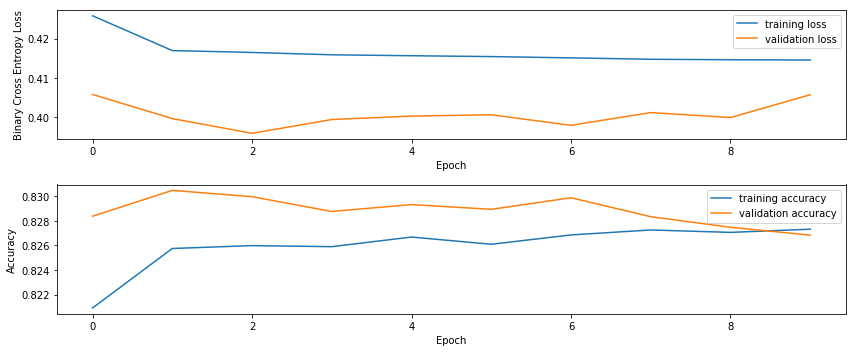

In [44]:
plot_model_results(history)

In [45]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Model 3\nTest Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 17us/step
Model 3
Test Loss: 0.3583707093529381
Test Accuracy: 0.8531450577663672


From the result above, we can see humidity alone gives us over 85% accuracy on prediction, thus concluding that humidity has the greatest influence over the weather prediction.

# Ethics & Privacy
We did have permission to use the data we used for training models to predict rain in Australia according to the data given. The following is a link to the terms of use from Kaggle, the website we used: https://www.kaggle.com/terms. There were no privacy concerns regarding our datasets that we needed to deal with, because the data is publicly disclosed and is not about people but about weather. We have included a link to the terms of use above, and we have complied with those terms.

There are limited potential biases in our dataset, as it was collected on weather features, which are objective, are not easily affected by bias, and are unlikely to inspire bias (due to lack of invested/controversial opinions about it). The data was collected from the Australian government’s Bureau of Metereology, which is likely inclined to be accurate about collecting data. Our data did not exclude particular populations and was collected from multiple different areas in Australia. It is unlikely that the data we used reflected any particular human biases in a way that could be a problem.

We address the areas that commonly are considered potentially problematic in terms of data privacy and equitable impact in the following sections, most of which were mostly irrelevant to our research question, data collection, data usage/analysis, and conclusion.

Question: The result(s) of the question do matter, because they can help people plan for the following day– if the analysis we do allows us to make accurate predictions about the weather. The scope of people who could be affected by the results of this study is large, potentially covering everyone in Australia, if they choose to use the results of the study to plan out their days. It could also include anyone who intends to visit Australia, as whether it rains or does not rain on those days could influence their decision to visit. However, the potential to harm people through our findings is limited, as only extreme situations of inaccuracy would harm people. One example of this situation is inaccurately predicting no rain causing people to go out the following day in less clothing and the weather ends up actually stormy or more extreme, causing people to catch colds or hypothermia. Another way the outcome of this question could harm people is if the model created more accurately predicts rain than professional weather stations or channels. If so, it can negatively impact the livelihood of meteorologists who predict the weather if they are not needed for weather prediction. This is unlikely because they probably have better prediction models, and they are also predicting far more than just rain or no rain. The tourism industry in Australia may also be affected if people decided not to visit Australia because they thought it would rain on the days of their visit. 

Implications: There are no shareholders (we were not being paid to do this study). We were not pushed to do something we are not morally comfortable doing. This information is unlikely to be used for nefarious purposes. It cannot be used to judge people based on illegitimate criteria or anything along those lines as the data and the question being asked is not about people, but about weather.

Data: There is data available about observations of Australian weather, which is related to the question being asked. They are from multiple weather stations, which increases the legitimacy and accuracy of the data provided. We were permitted to use the data we used. The terms of use were included above. 

Informed consent: There were no human subjects that we studied for this question, merely observations on weather.

Privacy: There were no human subjects that we studied for this question, so there is no personally identifiable information that we collected. There was then no need to de-identify or identify data.

Evaluation: Our metric for success is separate from the goal. The goal is to identify what feature in weather has the greatest influence on predicting the weather for the next day. 

Analysis: We strove to make sure that any correlations that we found were not assumed to be causal. For example, had we found that an increased number of people visiting a location correlated to sunny weather, we did not conclude that people visiting a location caused sunny weather in that location. 

Transparency: It does not matter if the model is a black box or not because the decisions that the model generates is not judging or making statements about the character or anything about people. The results may affect people, but only so far as it affects how people prepare for weather. The primary problem with black box models is that they are hard for people to appeal, but this is not a problem for the question we asked.

Continuous monitoring: None of the data collected should be able to be used to harm people. We tried to make sure that we filtered out the data that is not needed and used the data that we did need.



# Conclusion & Discussion

Our question asked which weather feature(s) would have the most influence over the accuracy when predicting the following day’s weather in Australia. We hypothesized that humidity would be the most influential in predicting the weather. After data analysis, we were able to see that the most significant feature in our prediction is Humidity at 3pm, which aligns with what we stated in our hypothesis. Therefore, we conclude that humidity is a significant factor in predicting future weather. 

Limitations on our project are that our data was only collected from the years of 2008-2016 and only focuses on Australia, so the weather prediction feature we are able to conclude from our data cannot be generalized to other locations in the world or cannot be generalized to current weather patterns(from 2017-2019) in Australia. This work can be followed similarly if one has enough current data and wants to predict more current weather patterns of other locations in the world.
